# Bose–Hubbard Model 

The Hamiltonian of the one dimensional Bose–Hubbard model can be written as:


$$\hat{H} = -t \sum_{<i,j>} \left(\hat{a}_i^\dagger\hat{a}_j + \hat{a}_j^\dagger\hat{a}_i\right)
          + \frac{U}{2} \sum_{i=1}^M  \,\hat{n}_i \left(\hat{n}_i - 1\right)$$

where $\hat{a}_i^\dagger$ and $\hat{a}_i$ are creation and annihilation operators, and 
$\hat{n}_i=\hat{a}_i^\dagger\hat{a}_i$ is the particle number operator, $M$ is the total numbers of the sites.


In [1]:
using LinearAlgebra 
using Plots #Graph
using StaticArrays 
using SparseArrays 
using Arpack  #Eigenvalues and eigenvectors

#definition of N,M,D
global N=4
global M=4
global D=Int((factorial(M+N-1))/(factorial(M-1)*factorial(N)))  

#primes function 
p(i)=100i+3 

#Generate a basis for N=M=4 
v = []
for n1 in 0:N  
    for n2 in 0:(N-n1)  
        for n3 in 0:(N-n1-n2)  
            for n4 in 0:(N-n1-n2-n3)
            if n1+n2+n3+n4 != N
                continue 
            end
            pushfirst!(v, [n1,n2,n3,n4])  
            end
        end
    end
end    

In [25]:
#tag function
function tag(b,M)
    tag=0;
    for i in 1:M
        tag += (√p(i))*b[i] 
    end
    return tag 
end

tag (generic function with 1 method)

In [26]:
function creation_ann(k,j,v)     
    if(v[j] >= 1) 
        b = copy(v)
        value = sqrt(((b[k])+1)*b[j])
        b[j] -= 1; 
        b[k] += 1;    
        return [value , b]   
    else 
        return 0; 
    end 
end   

creation_ann (generic function with 1 method)

In [27]:
function matrixofcreationann(i,k)
    mat = spzeros(D,D)
    for j in 1:D 
        if creation_ann(i,k,v[j]) == 0 
           continue      
        end
        mat[DictOfInds[tag(creation_ann( i, k , v[j] )[2],M)], j] = creation_ann(i, k , v[j])[1] 
    end    
    return mat
end

matrixofcreationann (generic function with 1 method)

In [28]:
#Valores de la diagonal de los numeros de ocupacion
function valdiags(k, v, M)  
    if(v[k] >= 1)  
        return  (v[k]*(v[k]-1))/2  
    else 
        return 0;
    end  
end       

valdiags (generic function with 1 method)

In [29]:
function occupation(i, v) 
     if(v[i] >= 1)  
        return  v[i]  
    else 
        return 0;
    end  
end       

occupation (generic function with 1 method)

In [30]:
function matrixoccupation(k, D) 
    mat = spzeros(D,D)
    for j in 1:D 
        mat[j,j] = occupation(k, v[j]) 
    end   
    return mat 
end

matrixoccupation (generic function with 1 method)

In [31]:
println(v[2])

[3, 1, 0, 0]


In [48]:
matrixoccupation(1,D)

35×35 SparseMatrixCSC{Float64, Int64} with 20 stored entries:
⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀

In [49]:
#Array de tags 
T = []
for i in 1:length(v) 
     push!(T,  tag( v[i] , M )) 
end

In [50]:
#Ordenamos y hacemos un diccionario Tsorted => indices
inds = sortperm(T);
Tsorted = T[inds];
#DictOfInds = Dict(zip(Tsorted, inds)) 
DictOfInds = Dict(Tsorted .=> inds)

Dict{Float64, Int64} with 35 entries:
  52.8923 => 11
  57.7795 => 9
  56.0514 => 12
  60.1503 => 22
  56.9912 => 21
  72.2955 => 32
  74.9635 => 33
  61.8785 => 15
  74.4724 => 30
  65.9774 => 25
  40.5956 => 1
  67.7055 => 19
  48.7934 => 5
  71.8044 => 29
  62.8183 => 23
  80.2994 => 35
  77.6315 => 34
  50.5215 => 4
  66.4685 => 27
  44.6945 => 2
  47.8536 => 3
  63.3094 => 24
  59.2105 => 14
  69.6276 => 31
  62.3696 => 17
  ⋮       => ⋮

Any[6.0, 3.0, 3.0, 3.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 3.0, 1.0, 1.0, 1.0, 0.0, 1.0, 3.0, 1.0, 1.0, 3.0, 6.0, 3.0, 3.0, 2.0, 1.0, 2.0, 3.0, 1.0, 1.0, 3.0, 6.0, 3.0, 2.0, 3.0, 6.0]


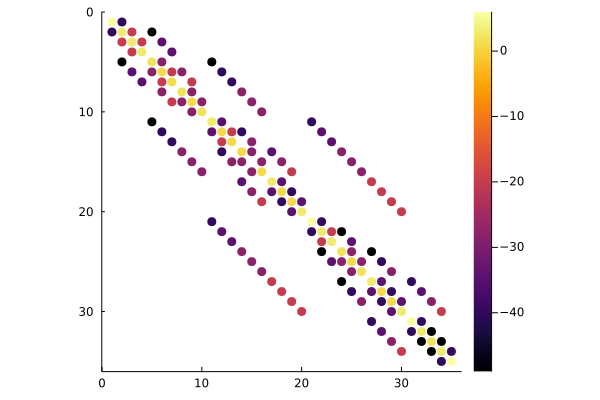

In [52]:
#for t in 1:10
#    J=10
#    U=t*J*0.1 
#obtener H_int 
diagscomp = [];
for j in 1:D 
    sumsdeocup = []; 
    for k in 1:M
        push!(sumsdeocup, valdiags(k, v[j], M))
    end  
    push!(diagscomp, sum(sumsdeocup))    
end   
#Mostramos la parte  
println(diagscomp)
Hint = spzeros(D,D)
Hint[diagind(Hint)] = diagscomp; Hint 
#println(Hint)
#Hint=diagm(diagscomp) 
#spy(Hint) 
J = 20
Hkin = spzeros(D,D)
for j in 1:D
        for k in 1:M 
            for h in 1:M   
                if k == h 
                    break 
                elseif creation_ann(k,h,v[j]) == 0 
                    continue  
                elseif abs(k-h)>=2 
                    continue 
                else 
                     Hkin[DictOfInds[tag(creation_ann( k, h , v[j] )[2],M)], j] = -J*(creation_ann( k, h , v[j])[1])     
                end
            end 
        end  
    end  
Hkin = Symmetric(Hkin, :L)
#println(Hkin)  
#spy(Hkin)

H=Hkin+Hint
spy(H, markersize = 5)

In [53]:
Eval, Evec = eigs(H , nev=2 , which=:SR)

([-127.66465040309969, -107.36940118051575], [-0.01796460694436666 -0.058338665958863625; -0.06003082267119661 -0.16534549063566256; … ; -0.06003082267119596 0.16534549063566317; -0.017964606944366444 0.058338665958863875], 2, 3, 56, [0.3917924269687118, 3.980833071720017, -4.385959761825144, -11.020529091520993, 8.720244432445128, -4.523437517575637, -1.9793066868587368, 0.1286823425425473, -0.7216794189098403, -2.861813693969899  …  2.385419867533177, 1.9213085139504646, -3.5555556497867986, 3.8139053371008207, 6.807334668733083, 1.292529801743125, 2.5291367229327935, -4.594953072019245, -9.820582434414604, 0.09429464175970409])

In [43]:
H

35×35 SparseMatrixCSC{Float64, Int64} with 234 stored entries:
⢿⣷⠲⡠⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠘⡢⢿⢗⡦⠙⢔⠄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠈⣌⠋⠛⣤⣄⡑⠈⠂⢤⢀⠀⠀⠀⠀⠀⠀
⠀⠀⠐⠕⢄⠹⡵⣫⠲⣄⠀⠑⢅⠢⡀⠀⠀⠀
⠀⠀⠀⠈⠢⠀⠘⢦⠻⣦⠀⠀⠀⠑⢄⠑⢄⠀
⠀⠀⠀⠀⠀⢓⢄⠀⠀⠀⢿⢗⡦⣀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠡⡑⢄⠀⠈⢫⡛⣬⡓⢤⡀⠀
⠀⠀⠀⠀⠀⠀⠀⠈⢄⠑⠀⠀⠙⣌⠛⣤⡙⠂
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⠀⠀⠀⠈⠳⠈⠻⠆

In [151]:
H

35×35 SparseMatrixCSC{Float64, Int64} with 274 stored entries:
⣿⣿⠲⡢⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠸⡢⢿⢗⡦⠙⢕⠦⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠙⣌⠋⠛⣤⣄⡑⠈⠓⢤⢄⡀⠀⠀⠀⠀⠀
⠀⠀⠱⡕⢄⠹⡵⣫⠲⣄⠀⠑⢍⠲⣄⠀⠀⠀
⠀⠀⠀⠘⢦⠀⠘⢦⠻⣦⠀⠀⠀⠑⢄⠙⢦⡀
⠀⠀⠀⠀⠀⢗⢄⠀⠀⠀⢿⢗⡦⣀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠈⢣⡑⢄⠀⠈⢫⡛⣬⡓⢤⡀⠀
⠀⠀⠀⠀⠀⠀⠀⠙⣄⠑⠀⠀⠙⣌⠛⣤⡙⠂
⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⠀⠀⠀⠈⠳⠈⠻⠆

In [54]:
G = Evec[:,1] 

35-element Vector{Float64}:
 -0.01796460694436666
 -0.06003082267119661
 -0.061423520067626296
 -0.03848670615546478
 -0.1203689828869221
 -0.17480815727716847
 -0.10970756709361176
 -0.12409293414043178
 -0.11054960020507305
 -0.04822925706857101
 -0.15763248414871936
 -0.2813819695047868
 -0.1768778001871143
  ⋮
 -0.3172313844704809
 -0.28352615619673777
 -0.12409293414043114
 -0.25612512996793513
 -0.28138196950478495
 -0.17480815727716728
 -0.06142352006762572
 -0.12381960761319068
 -0.1576324841487181
 -0.1203689828869209
 -0.06003082267119596
 -0.017964606944366444

In [55]:
SPDM = spzeros(M,M) 
for k in 1:M 
    for h in 1:M   
        if k == h 
            SPDM[k , k] = dot(G, matrixoccupation(k,D)*G) 
        else  
            t = matrixofcreationann(k,h)*G
            SPDM[k , h] = dot(G,t)  
        end
    end  
end   
SPDM = Symmetric(SPDM, :L)

4×4 Symmetric{Float64, SparseMatrixCSC{Float64, Int64}}:
 0.564652  0.900204  0.900058  0.564495
 0.900204  1.43535   1.43512   0.900058
 0.900058  1.43512   1.43535   0.900204
 0.564495  0.900058  0.900204  0.564652

In [56]:
EvalSPDM, EvecSPDM = eigs(SPDM , nev=1)

([3.9995561432941065], [-0.37570419732653604; -0.5990378586627261; -0.5990378586627252; -0.3757041973265345], 1, 1, 4, [0.0, 0.0, 0.0, 0.0])

In [57]:
EvalSPDM

1-element Vector{Float64}:
 3.9995561432941065

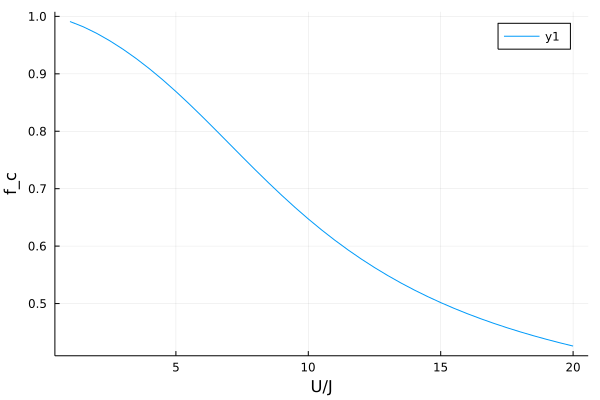

In [58]:
fconde = Vector{Float64}() 
variance = Vector{Float64}()  
correlation = Vector{Float64}() 
for t in 1:0.5:20
    J=10
    U=t*J
    diagscomp = [];
    for j in 1:D 
        sumsdeocup = []; 
        for k in 1:M
        push!(sumsdeocup, valdiags(k, v[j], M))
        end  
        push!(diagscomp, sum(sumsdeocup))    
    end    
    Vals = U*diagscomp
    Hint = spzeros(D,D)
    Hint[diagind(Hint)] = Vals; Hint 
    Hkin = spzeros(D,D)
    firstcolumn = [] 
    for j in 1:D
        for k in 1:M 
            for h in 1:M   
                if k == h 
                    break 
                elseif creation_ann(k,h,v[j]) == 0 
                    continue 
                elseif abs(k-h)>2 
                    continue 
                else 
                     Hkin[DictOfInds[tag(creation_ann( k, h , v[j] )[2],M)], j] = -J*(creation_ann( k, h , v[j])[1])     
                end
            end 
        end  
    end  
    Hkin = Symmetric(Hkin, :L)  
    H=Hkin+Hint  
    Eval, Evec = eigs(H,nev=2,which=:SR, v0 = ones(D))   
    G = Evec[:,1]
    SPDM = spzeros(M,M) 
    for k in 1:M 
        for h in 1:M   
            if k == h 
                SPDM[k , k] = dot(G, matrixoccupation(k,D)*G) 
            else  
                t = matrixofcreationann(k,h)*G
                SPDM[k , h] = dot(G,t)  
            end
        end  
    end   
    SPDM = Symmetric(SPDM, :L)
    EvalSPDM, EvecSPDM = eigs(SPDM , nev=1, which =:LR, v0=ones(M))    
    push!(fconde, real(EvalSPDM[1])/N)   
    #Correlacion  
    #push!(correlation, dot(G, matrixofcreationann(1 ,floor(M/2) )*G )) 
    #Varianza 
    v1 = matrixoccupation(2,D)
    v2 = matrixoccupation(2,D)^2
    push!(variance, sqrt(dot(G, v2*G) - (dot(G, v1*G))^2)) 
end       
t = 1:0.5:20
plot(t,fconde, xlabel = "U/J", ylabel= "f_c")
#plot(t,variance, xlabel = "U/J", ylabel= "σᵢ") 
#plot(t, correlation, xlabel = "U/J", ylabel = "ρ⁽¹⁾")

In [110]:
fconde = Vector{Float64}() 
variance = Vector{Float64}()  
correlation = Vector{Float64}() 
for t in 1:0.5:20
    J=10
    U=t*J
    diagscomp = [];
    for j in 1:D 
        sumsdeocup = []; 
        for k in 1:M
        push!(sumsdeocup, valdiags(k, v[j], M))
        end  
        push!(diagscomp, sum(sumsdeocup))    
    end    
    Vals = U*diagscomp
    Hint = spzeros(D,D)
    Hint[diagind(Hint)] = Vals; Hint 
    Hkin = spzeros(D,D)
    firstcolumn = [] 
    for j in 1:D
        for k in 1:M 
            for h in 1:M   
                if k == h 
                    break 
                elseif creation_ann(k,h,v[j]) == 0 
                    continue 
                else 
                     Hkin[DictOfInds[tag(creation_ann( k, h , v[j] )[2],M)], j] = -J*(creation_ann( k, h , v[j])[1])     
                end
            end 
        end  
    end  
    Hkin = Symmetric(Hkin, :L)  
    H=Hkin+Hint  
    Eval, Evec = eigs(H,nev=2,which=:SR, v0 = ones(D))   
    G = Evec[:,1]
    SPDM = spzeros(M,M) 
    for k in 1:M 
        for h in 1:M   
            if k == h 
                SPDM[k , k] = dot(G, matrixoccupation(k,D)*G) 
            else  
                t = matrixofcreationann(k,h)*G
                SPDM[k , h] = dot(G,t)  
            end
        end  
    end   
    SPDM = Symmetric(SPDM, :L)
    EvalSPDM, EvecSPDM = eigs(SPDM , nev=1)    
    push!(fconde, real(EvalSPDM[1])/N)   
    #Correlacion  
#   push!(correlation, dot(G, matrixofcreationann(1 ,floor(M/2) )*G )) 
    #Varianza 
    v1 = matrixoccupation(3,D)
    v2 = matrixoccupation(3,D)^2
    push!(variance, sqrt(dot(G, v2*G) - (dot(G, v1*G))^2)) 
end       
t = 1:0.5:20
plot(t,fconde, xlabel = "U/J", ylabel= "f_c")
#plot(t,variance, xlabel = "U/J", ylabel= "σ") 
#plot(t, correlation, xlabel = "U/J", ylabel = "ρ⁽¹⁾")

LoadError: KeyError: key 44.69448154405166 not found

In [33]:
matrixofcreationann(3,3)

10×10 SparseMatrixCSC{Float64, Int64} with 6 stored entries:
  ⋅    ⋅    ⋅        ⋅    ⋅        ⋅        ⋅    ⋅        ⋅        ⋅ 
  ⋅    ⋅    ⋅        ⋅    ⋅        ⋅        ⋅    ⋅        ⋅        ⋅ 
  ⋅    ⋅   1.41421   ⋅    ⋅        ⋅        ⋅    ⋅        ⋅        ⋅ 
  ⋅    ⋅    ⋅        ⋅    ⋅        ⋅        ⋅    ⋅        ⋅        ⋅ 
  ⋅    ⋅    ⋅        ⋅   1.41421   ⋅        ⋅    ⋅        ⋅        ⋅ 
  ⋅    ⋅    ⋅        ⋅    ⋅       2.44949   ⋅    ⋅        ⋅        ⋅ 
  ⋅    ⋅    ⋅        ⋅    ⋅        ⋅        ⋅    ⋅        ⋅        ⋅ 
  ⋅    ⋅    ⋅        ⋅    ⋅        ⋅        ⋅   1.41421   ⋅        ⋅ 
  ⋅    ⋅    ⋅        ⋅    ⋅        ⋅        ⋅    ⋅       2.44949   ⋅ 
  ⋅    ⋅    ⋅        ⋅    ⋅        ⋅        ⋅    ⋅        ⋅       3.4641

In [282]:
creation_ann(2,3,v[10])

2-element Vector{Any}:
 1.7320508075688772
  [0, 1, 2]

In [298]:
v[8]

3-element Vector{Int64}:
 0
 2
 1

In [18]:
v = [[0 for j in 1:M] for j in 1:D] 
v[1][1]=N
a=[0 for j in 1:M]
    for i in range(1,D):
        k=M-1
        while v[i-1][k]==0:
            k=k-1
        a[:]=v[i-1][:]
        if k!=M-1:
            a[k]=v[i-1][k]-1
            suma=0
            for j in range(k+1):
                suma=suma+a[j]
            a[k+1]=N-suma
            v[i][:]=a[:]
        if k==M-1:
            l=M-2
            while v[i-1][l]==0:
                l=l-1
            a[l]=v[i-1][l]-1
            suma=0
            for j in range(l+1):
                suma=suma+a[j]
            a[l+1]=N-suma
            for j in range(l+2,M):
                a[j]=0
            v[i][:]=a[:]
        
    print(v) 

LoadError: BoundsError: attempt to access 4-element Vector{Int64} at index [5]

In [4]:
function generate_basis(N, M, D)
    basis = [[0 for j in 1:M] for j in 1:D] 
    v1[1][1]=N  
    a=[0 for j in 1:M]
end

4

In [5]:
a=[0 for j in 1:M]

4-element Vector{Int64}:
 0
 0
 0
 0

In [3]:
v1

35-element Vector{Vector{Int64}}:
 [4, 0, 0, 0]
 [0, 0, 0, 0]
 [0, 0, 0, 0]
 [0, 0, 0, 0]
 [0, 0, 0, 0]
 [0, 0, 0, 0]
 [0, 0, 0, 0]
 [0, 0, 0, 0]
 [0, 0, 0, 0]
 [0, 0, 0, 0]
 [0, 0, 0, 0]
 [0, 0, 0, 0]
 [0, 0, 0, 0]
 ⋮
 [0, 0, 0, 0]
 [0, 0, 0, 0]
 [0, 0, 0, 0]
 [0, 0, 0, 0]
 [0, 0, 0, 0]
 [0, 0, 0, 0]
 [0, 0, 0, 0]
 [0, 0, 0, 0]
 [0, 0, 0, 0]
 [0, 0, 0, 0]
 [0, 0, 0, 0]
 [0, 0, 0, 0]